# 本脚本用于分析数据集 "GitHub Dataset"
分析流程如下：

## 1. 利用pandas库读取数据
GITHub Dataset有两个Version，Version1

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据集
df1 = pd.read_csv(r'data\GitHub_Dataset\github_dataset.csv')
df2 = pd.read_csv(r'data\GitHub_Dataset\repository_data.csv')

## 2. 数据摘要与可视化，分为以下三个部分：
### 1. 首先查看各列数据类型。
### 2. 数据摘要：对于标称属性，给出可能的取值与频数；对于数值属性，给出五数概括及缺失值的个数。
### 3. 数据可视化：使用直方图、盒图等检查数据分布及离群点。

In [23]:
# 1. 查看数据类型
for col in df1.columns:
    print(col+' : '+ str(df1[col].dtype))
print('\n')
for col in df2.columns:
    print(col+' : '+ str(df2[col].dtype))

repositories : object
stars_count : int64
forks_count : int64
issues_count : int64
pull_requests : int64
contributors : int64
language : object


name : object
stars_count : int64
forks_count : int64
watchers : int64
pull_requests : int64
primary_language : object
languages_used : object
commit_count : float64
created_at : object
licence : object


其中，GitHub数据集中的各个属性的含义为：repositories - 仓库的名称 (格式 - github_username/repository_name).
stars_count - 仓库star数.
forks_count - 仓库fork数.
issues_count - opend issue数目。
pull_requests - 仓库中pull requests的数目.
contributors - 到目前为止，贡献者为该项目做出的贡献.
language - 项目中使用的主要语言.
其中，repository数据集中的各个属性的含义为：name - 仓库的名称.
stars_count - 仓库star数.
forks_count - 仓库fork数.
watchers - 仓库的观察者.
pull_requests - 仓库中pull requests的数目.
primary_language - 项目中使用的主要语言.
languages_used - 项目中使用的所有语言.
commit_count - 在仓库中进行的提交.
created_at - 创建仓库的时间和日期.
license - 分配给仓库的许可证.

In [24]:
# 2. 计算标称属性的频数
for col in df1.select_dtypes(include=['object']):
    print(col)
    print(df1[col].value_counts())

print('\n')
for col in df2.select_dtypes(include=['object']):
    print(col)
    print(df2[col].value_counts())

repositories
kameshsampath/ansible-role-rosa-demos         2
aloisdeniel/bluff                             2
antoniaandreou/github-slideshow               2
jgthms/bulma-start                            2
artkirienko/hlds-docker-dproto                2
                                             ..
WhiteHouse/CIOmanagement                      1
0xCaso/defillama-telegram-bot                 1
ethereum/blake2b-py                           1
openfoodfacts/folksonomy_mobile_experiment    1
gamemann/All_PropHealth                       1
Name: repositories, Length: 972, dtype: int64
language
JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#                  

以上给出了各个标称属性的频数。

In [25]:
# 计算数值属性的5数概括和缺失值个数
print('GitHub Dataset')
for col in df1.select_dtypes(include=[np.number]):
    print(col)
    print('Minimum: ', df1[col].min())
    print('25th percentile: ', df1[col].quantile(0.25))
    print('Median: ', df1[col].median())
    print('75th percentile: ', df1[col].quantile(0.75))
    print('Maximum: ', df1[col].max())
    print('Missing values: ', df1[col].isnull().sum())
    print('\n')
print('repository Dataset')
for col in df2.select_dtypes(include=[np.number]):
    print(col)
    print('Minimum: ', df2[col].min())
    print('25th percentile: ', df2[col].quantile(0.25))
    print('Median: ', df2[col].median())
    print('75th percentile: ', df2[col].quantile(0.75))
    print('Maximum: ', df2[col].max())
    print('Missing values: ', df2[col].isnull().sum())
    print('\n')

GitHub Dataset
stars_count
Minimum:  0
25th percentile:  1.0
Median:  12.0
75th percentile:  65.25
Maximum:  995
Missing values:  0


forks_count
Minimum:  0
25th percentile:  1.0
Median:  6.0
75th percentile:  38.25
Maximum:  973
Missing values:  0


issues_count
Minimum:  1
25th percentile:  1.0
Median:  2.0
75th percentile:  6.0
Maximum:  612
Missing values:  0


pull_requests
Minimum:  0
25th percentile:  0.0
Median:  0.0
75th percentile:  2.0
Maximum:  567
Missing values:  0


contributors
Minimum:  0
25th percentile:  0.0
Median:  2.0
75th percentile:  4.0
Maximum:  658
Missing values:  0


repository Dataset
stars_count
Minimum:  2
25th percentile:  7.0
Median:  12.0
75th percentile:  30.0
Maximum:  359805
Missing values:  0


forks_count
Minimum:  0
25th percentile:  1.0
Median:  4.0
75th percentile:  11.0
Maximum:  242208
Missing values:  0


watchers
Minimum:  0
25th percentile:  2.0
Median:  3.0
75th percentile:  6.0
Maximum:  9544
Missing values:  0


pull_requests
Minimum:

以上给出了数值属性的五数概括与缺失值。

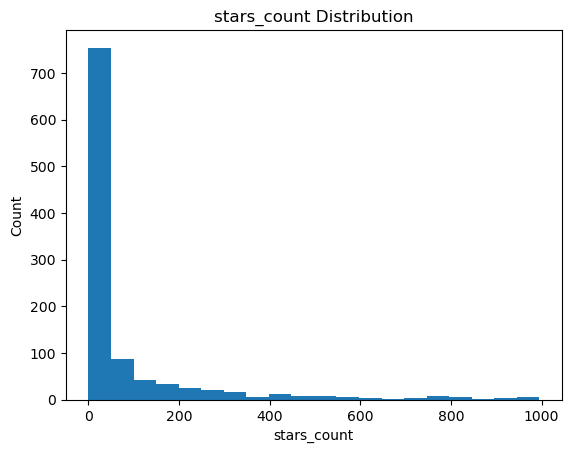

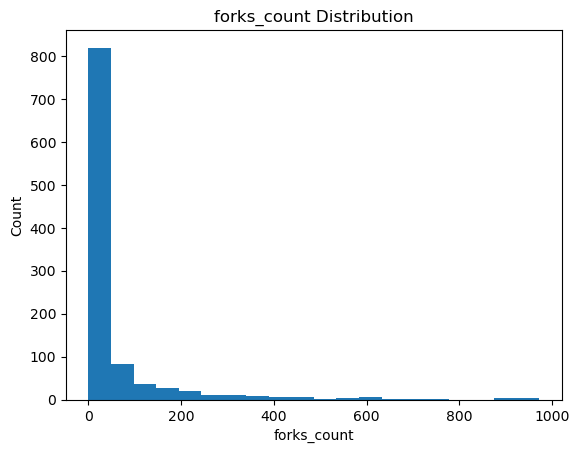

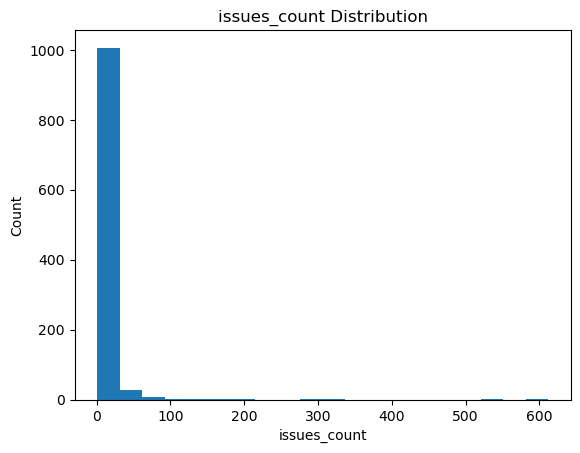

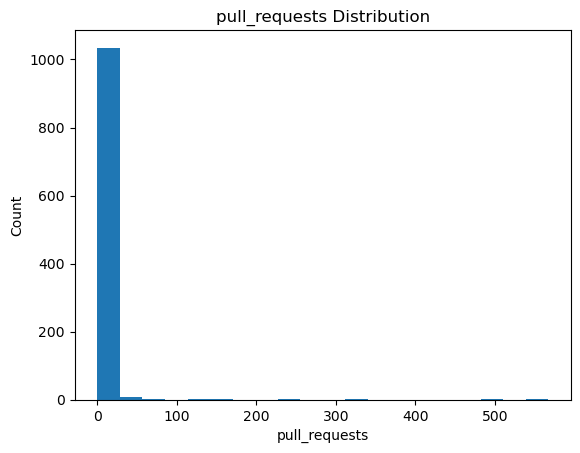

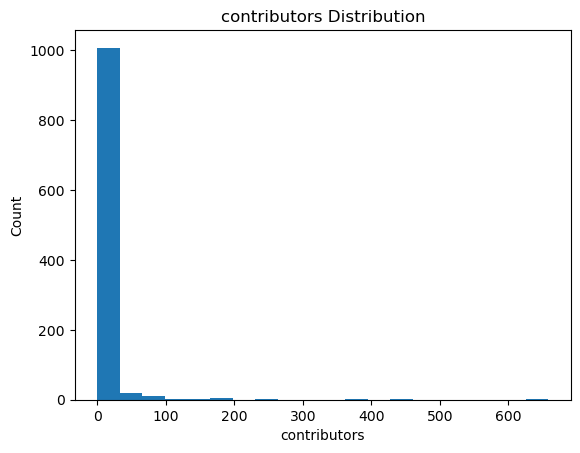

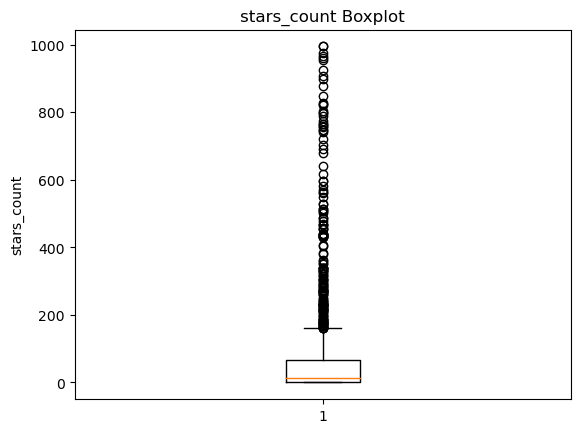

离群点为： [271, 956, 233, 960, 598, 598, 925, 332, 176, 176]


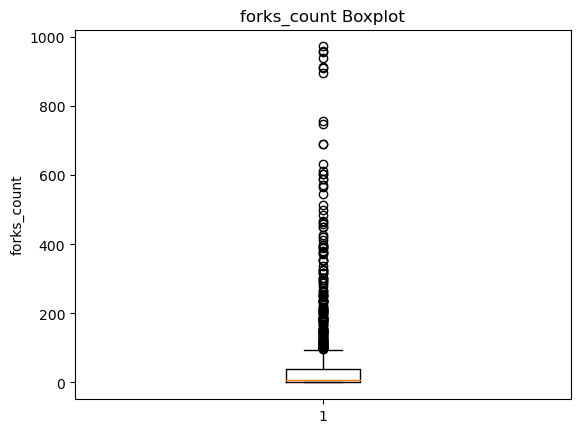

离群点为： [150, 589, 289, 198, 566, 353, 956, 169, 389, 237]


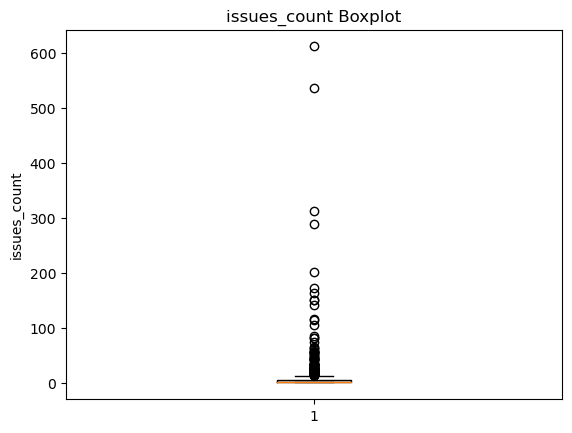

离群点为： [612, 536, 313, 290, 202, 172, 164, 151, 151, 142]


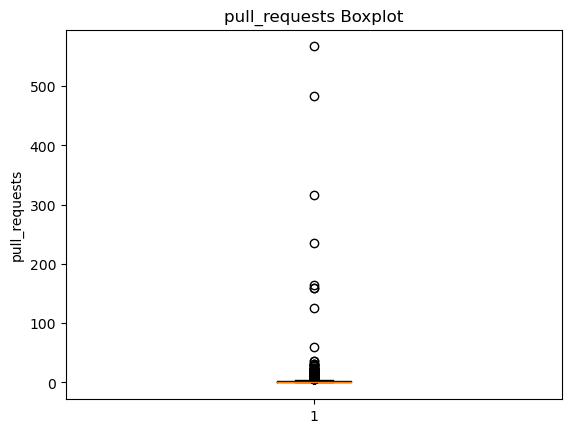

离群点为： [316, 6, 27, 30, 22, 164, 159, 159, 16, 10]


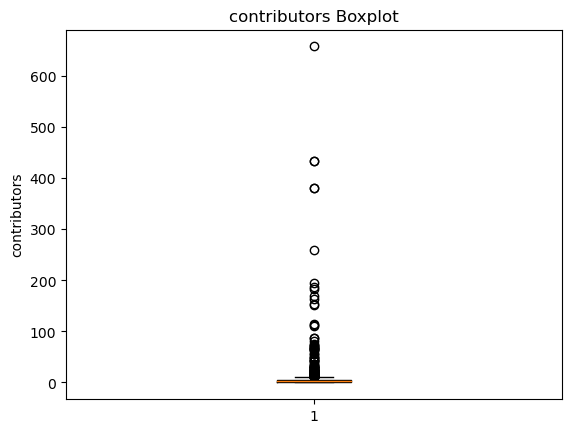

离群点为： [71, 154, 434, 67, 115, 380, 380, 186, 163, 169]


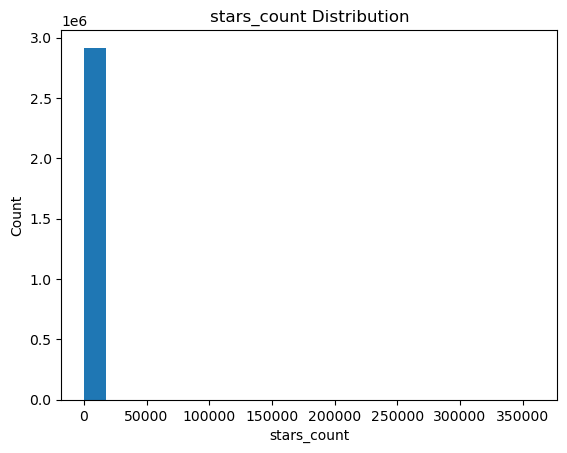

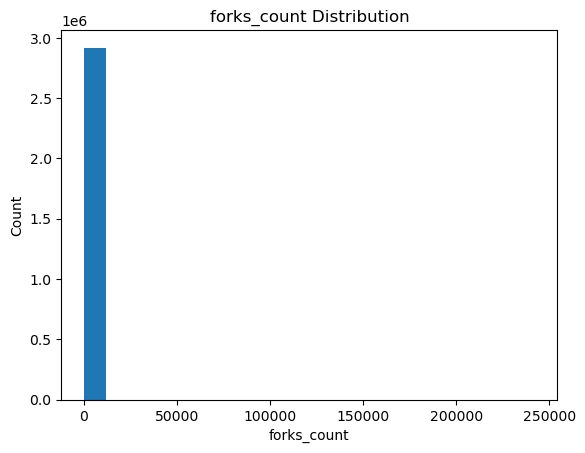

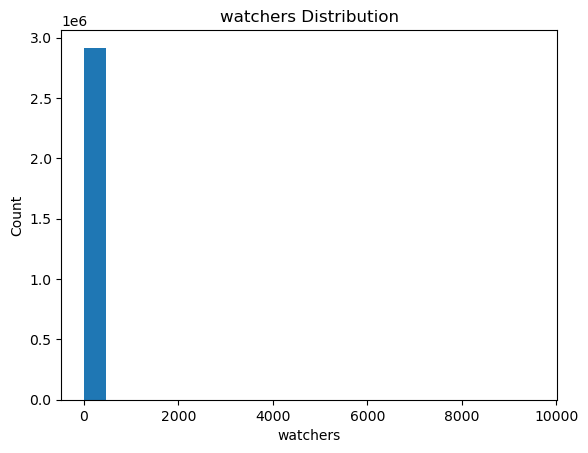

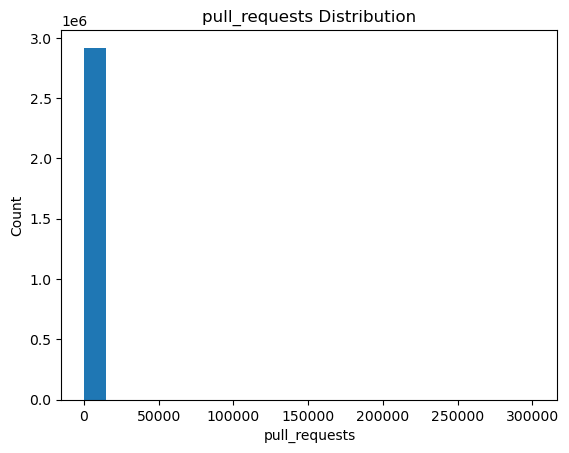

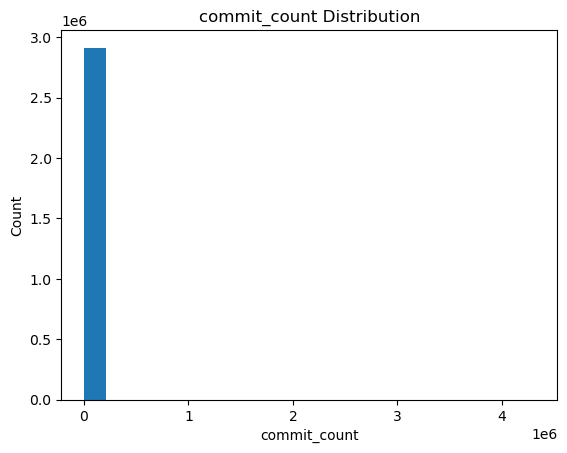

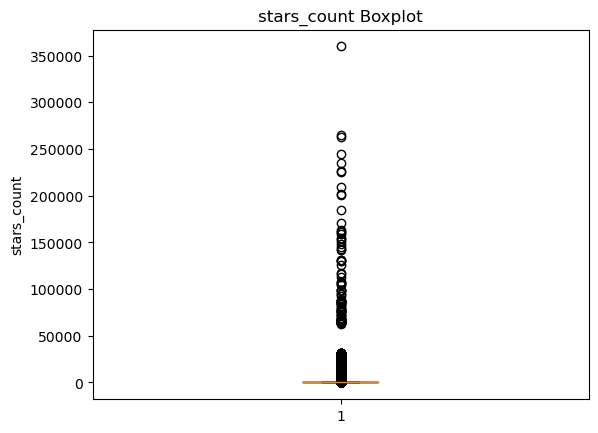

离群点为： [359805, 264811, 262380, 244927, 235223, 225982, 225267, 208977, 201896, 200838]


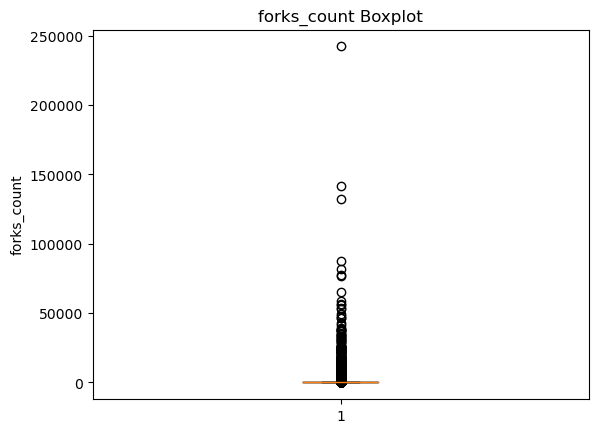

离群点为： [30814, 21470, 53302, 65038, 24791, 32534, 25654, 37414, 33255, 41721]


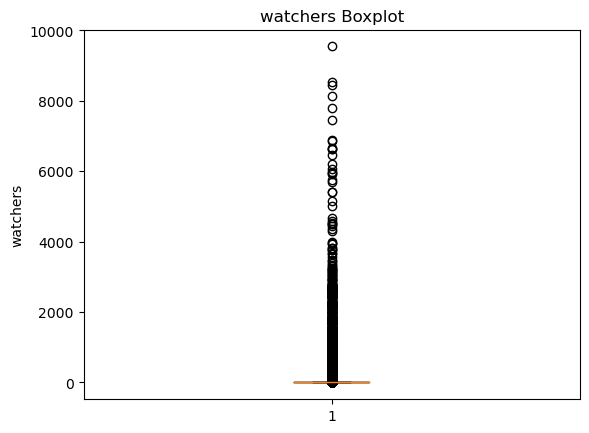

离群点为： [8448, 4298, 9544, 8539, 7446, 6885, 3772, 6466, 6051, 6644]


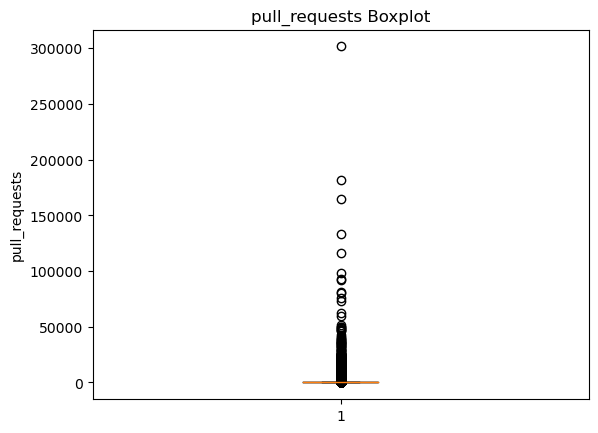

离群点为： [31867, 1949, 8235, 867, 1859, 2082, 2897, 455, 2365, 13061]


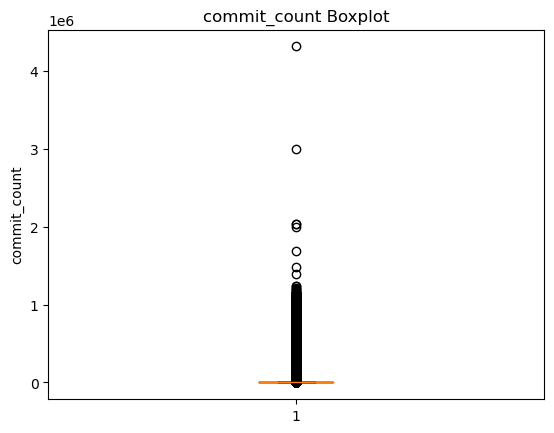

离群点为： [32231.0, 3189.0, 8286.0, 2314.0, 1074.0, 2821.0, 4527.0, 328.0, 3545.0, 15461.0]


In [26]:
# 3. 数据可视化
# 绘制GitHub数据集数值属性的直方图
for col in df1.select_dtypes(include=[np.number]):
    plt.hist(df1[col], bins=20)
    plt.title(col + ' Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# 绘制数值属性的盒图
for col in df1.select_dtypes(include=[np.number]):
    plt.boxplot(df1[col].dropna())
    plt.title(col + ' Boxplot')
    plt.ylabel(col)
    plt.show()
    # 显示离群点
    outliers = []
    q1, q3 = df1[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    for value in df1[col]:
        if value < lower_bound or value > upper_bound:
            outliers.append(value)
    print('离群点为：', outliers[:10])
# 绘制repository数据集数值属性的直方图
for col in df2.select_dtypes(include=[np.number]):
    plt.hist(df2[col], bins=20)
    plt.title(col + ' Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# 绘制repository数据集数值属性的盒图
for col in df2.select_dtypes(include=[np.number]):
    plt.boxplot(df2[col].dropna())
    plt.title(col + ' Boxplot')
    plt.ylabel(col)
    plt.show()
    # 显示离群点
    outliers = []
    q1, q3 = df2[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    for value in df2[col]:
        if value < lower_bound or value > upper_bound:
            outliers.append(value)
    print('离群点为：', outliers[:10])

以上绘制了数值数据的直方图、盒图，并分析了数据离群点。

## 3. 数据缺失的处理
首先分属性统计缺失数据：

In [27]:
print('GitHub Dataset')
for col in df1.select_dtypes(include=['number','object']):
    print(col,end='     ')
    print('Missing values: ', df1[col].isnull().sum())
print('\n')
print('repository Dataset')
for col in df2.select_dtypes(include=['number','object']):
    print(col,end='     ')
    print('Missing values: ', df2[col].isnull().sum())

GitHub Dataset
repositories     Missing values:  0
stars_count     Missing values:  0
forks_count     Missing values:  0
issues_count     Missing values:  0
pull_requests     Missing values:  0
contributors     Missing values:  0
language     Missing values:  145


repository Dataset
name     Missing values:  12
stars_count     Missing values:  0
forks_count     Missing values:  0
watchers     Missing values:  0
pull_requests     Missing values:  0
primary_language     Missing values:  218573
languages_used     Missing values:  221984
commit_count     Missing values:  1921
created_at     Missing values:  0
licence     Missing values:  1378200


分析缺失值缺失的原因：这些数据在GitHub中都应该存在，认为其缺失的原因是统计问题。由于GitHub数据集缺失只有language，故补充工作仅在repository Dataset上
### 3.1 剔除缺失属性值：
剔除数据集缺失部分的脚本可以使用 Pandas 库提供的 dropna() 函数，如下所示：

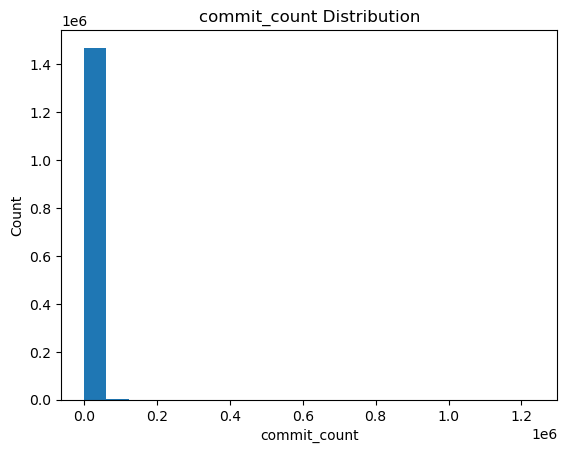

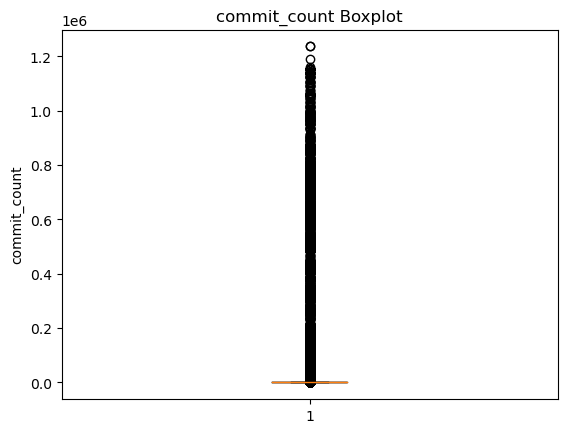

In [28]:
# 删除缺失部分
df_drop=df2.copy()
df_drop.dropna(inplace=True)
col='commit_count'
# 绘制repository数据集数值属性的直方图
plt.hist(df_drop[col], bins=20)
plt.title(col + ' Distribution')
plt.xlabel(col)
plt.ylabel('Count')
plt.show()

# 绘制repository数据集数值属性的盒图
plt.boxplot(df_drop[col].dropna())
plt.title(col + ' Boxplot')
plt.ylabel(col)
plt.show()

### 3.2 用最高频率值填补缺失值：
用最高频率值填补缺失值的脚本可以使用 Pandas 库提供的 fillna() 函数，如下所示：

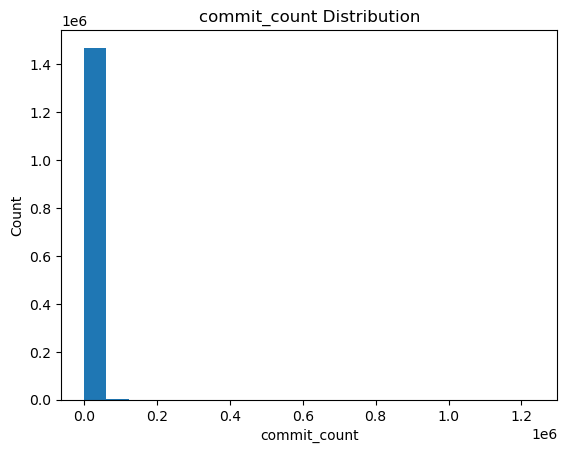

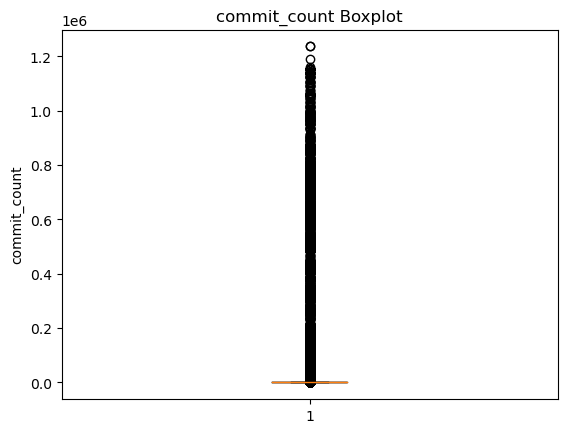

In [29]:
df_fill=df2.copy()
# 找出最高频率值
most_frequent_value = df_fill[col].mode()[0]

# 用最高频率值填补缺失部分
df_fill[col].fillna(most_frequent_value, inplace=True)

# 绘制repository数据集数值属性的直方图
plt.hist(df_drop[col], bins=20)
plt.title(col + ' Distribution')
plt.xlabel(col)
plt.ylabel('Count')
plt.show()

# 绘制repository数据集数值属性的盒图
plt.boxplot(df_drop[col].dropna())
plt.title(col + ' Boxplot')
plt.ylabel(col)
plt.show()

### 3.3 通过属性的相关关系来填补缺失值：
对于含有缺失值的属性，找到和该属性相关系数绝对值最大的一个或多个属性，对于每个缺失值，利用和其相关系数最大的一个或多个属性的已知值，结合线性回归等方法来预测该缺失值。这里简化线性回归，直接根据协方差最大的属性列的均值，与目标填充列统一量纲后填充，如下：

               stars_count  forks_count  watchers  pull_requests  commit_count
stars_count       1.000000     0.567460  0.706769       0.190988      0.015539
forks_count       0.567460     1.000000  0.487515       0.211495      0.018070
watchers          0.706769     0.487515  1.000000       0.161925      0.020066
pull_requests     0.190988     0.211495  0.161925       1.000000      0.046537
commit_count      0.015539     0.018070  0.020066       0.046537      1.000000


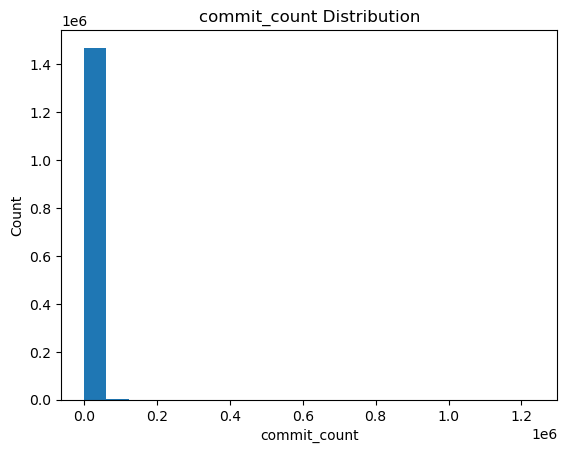

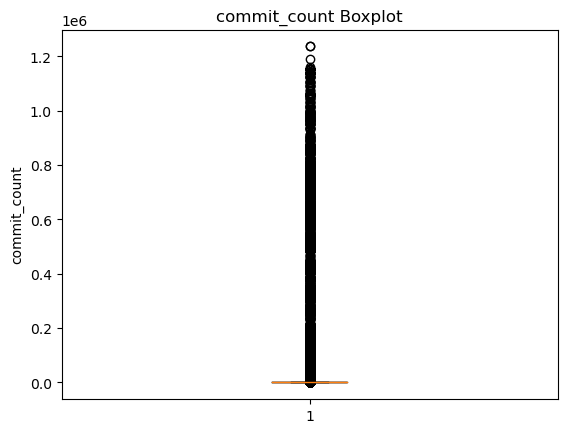

In [30]:
df_cor=df2.copy()

# 计算协方差矩阵
corr = abs(df_cor.corr())

# 展示协方差矩阵
print(corr)

# 均值化同一量纲后填充
highest_corr = corr[col].sort_values(ascending=False).index[1]
df_cor[col].fillna((df_cor[highest_corr]-df_cor[highest_corr].min())/(df_cor[col].max()-df_cor[col].min())* (df_cor[col]-df_cor[col].min())/(df_cor[col].max()-df_cor[col].min()), inplace=True)

# 绘制repository数据集数值属性的直方图
plt.hist(df_drop[col], bins=20)
plt.title(col + ' Distribution')
plt.xlabel(col)
plt.ylabel('Count')
plt.show()

# 绘制repository数据集数值属性的盒图
plt.boxplot(df_drop[col].dropna())
plt.title(col + ' Boxplot')
plt.ylabel(col)
plt.show()

### 3.4 通过数据对象之间的相似性来填补缺失值：
通过数据对象之间的相似性来填补缺失值的方法通常采用基于相似性的插值方法，其基本思想是利用已知数据对象之间的相似性来推断未知数据对象的缺失属性值。对于数值属性IMDb-rating，采用其列均值填充。对于标称属性，可以采用其众数填充。

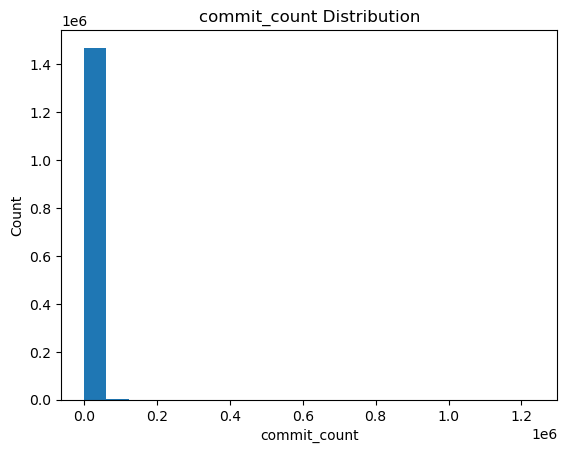

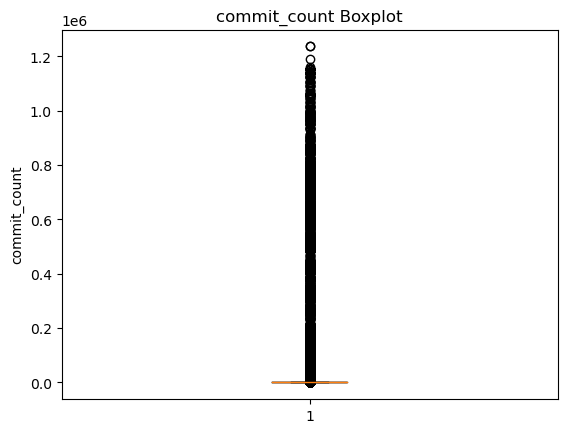

In [31]:
df_sim=df2.copy()
df_sim[col].fillna(df_sim[col].mean(), inplace=True)

# 绘制repository数据集数值属性的直方图
plt.hist(df_drop[col], bins=20)
plt.title(col + ' Distribution')
plt.xlabel(col)
plt.ylabel('Count')
plt.show()

# 绘制repository数据集数值属性的盒图
plt.boxplot(df_drop[col].dropna())
plt.title(col + ' Boxplot')
plt.ylabel(col)
plt.show()

仓库：https://github.com/HW-VMCL/DataMining